In [107]:
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [108]:
df=pd.read_excel('cleaned_up_transformed_data.xlsx')


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Наименование           6481 non-null   object 
 1   id                     6481 non-null   int64  
 2   Скидка                 6481 non-null   int64  
 3   Цена                   6481 non-null   int64  
 4   Цена со скидкой        6481 non-null   int64  
 5   Бренд                  6347 non-null   object 
 6   id бренда              6481 non-null   int64  
 7   feedbacks              6481 non-null   int64  
 8   rating                 6481 non-null   int64  
 9   Ссылка                 6481 non-null   object 
 10  Количество раз купили  3005 non-null   float64
 11  Подсветка              6481 non-null   int64  
 12  Страна производства    2284 non-null   object 
 13  Высота упаковки        5369 non-null   float64
 14  Длина упаковки         5321 non-null   float64
 15  Высо

In [110]:
dupl_columns = list(set(list(df.columns))-set(['id бренда','id', 'Наименование', 'Ссылка']))

In [111]:
mask = df.duplicated(subset=dupl_columns)
df_duplicates = df[mask]
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')

Число найденных дубликатов: 260


In [112]:
df = df.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {df.shape[0]}')

Результирующее число записей: 6221


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6221 entries, 0 to 6480
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Наименование           6221 non-null   object 
 1   id                     6221 non-null   int64  
 2   Скидка                 6221 non-null   int64  
 3   Цена                   6221 non-null   int64  
 4   Цена со скидкой        6221 non-null   int64  
 5   Бренд                  6090 non-null   object 
 6   id бренда              6221 non-null   int64  
 7   feedbacks              6221 non-null   int64  
 8   rating                 6221 non-null   int64  
 9   Ссылка                 6221 non-null   object 
 10  Количество раз купили  2951 non-null   float64
 11  Подсветка              6221 non-null   int64  
 12  Страна производства    2247 non-null   object 
 13  Высота упаковки        5128 non-null   float64
 14  Длина упаковки         5085 non-null   float64
 15  Высо

In [114]:
df.drop(columns = ['Бренд'],axis = 1, inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6221 entries, 0 to 6480
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Наименование           6221 non-null   object 
 1   id                     6221 non-null   int64  
 2   Скидка                 6221 non-null   int64  
 3   Цена                   6221 non-null   int64  
 4   Цена со скидкой        6221 non-null   int64  
 5   id бренда              6221 non-null   int64  
 6   feedbacks              6221 non-null   int64  
 7   rating                 6221 non-null   int64  
 8   Ссылка                 6221 non-null   object 
 9   Количество раз купили  2951 non-null   float64
 10  Подсветка              6221 non-null   int64  
 11  Страна производства    2247 non-null   object 
 12  Высота упаковки        5128 non-null   float64
 13  Длина упаковки         5085 non-null   float64
 14  Высота елки            6221 non-null   int64  
 15  Шири

In [116]:
df['Высота елки'].describe()

count    6221.000000
mean      144.034882
std        65.248821
min         3.000000
25%        90.000000
50%       150.000000
75%       180.000000
max       500.000000
Name: Высота елки, dtype: float64

Добавляем новую категорию категория высоты елки (1 - низкая, 2 - ниже среднего, 3 - выше среднего, 4 - высокая)

In [117]:
def new_kat(st):
    if st<90:
        return 1
    elif st<150:
        return 2
    elif st<180:
        return 3
    elif st>=180:
        return 4
    
    

In [118]:
df['Категория высоты елки']=df['Высота елки'].apply(new_kat)

### Работаем с пропусками

#### Создаём словарь для каждой категории 'имя_столбца': число (признак), на который надо заменить пропуски  

In [119]:
for i in range(1,5):
    values = {
    'Высота упаковки': df[df['Категория высоты елки']==i]['Высота упаковки'].median(),
    'Длина упаковки': df[df['Категория высоты елки']==i]['Длина упаковки'].median(),
    'Ширина упаковки': df[df['Категория высоты елки']==i]['Ширина упаковки'].median(),
    'Вес с упаковкой (кг)': df[df['Категория высоты елки']==i]['Вес с упаковкой (кг)'].median(),
    }
    df[df['Категория высоты елки']==i] = df[df['Категория высоты елки']==i].fillna(values)

In [120]:

values = {
    'Количество раз купили': 0,
    'Страна производства': df['Страна производства'].describe()[2],
}


#### Заполняем оставшиеся записи константами в соответствии со словарем values

In [121]:
df= df.fillna(values)


#### Выводим результирующую долю пропусков

In [122]:
display(df.isnull().mean())

Наименование             0.0
id                       0.0
Скидка                   0.0
Цена                     0.0
Цена со скидкой          0.0
id бренда                0.0
feedbacks                0.0
rating                   0.0
Ссылка                   0.0
Количество раз купили    0.0
Подсветка                0.0
Страна производства      0.0
Высота упаковки          0.0
Длина упаковки           0.0
Высота елки              0.0
Ширина упаковки          0.0
Вес с упаковкой (кг)     0.0
Категория высоты елки    0.0
dtype: float64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6221 entries, 0 to 6480
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Наименование           6221 non-null   object 
 1   id                     6221 non-null   int64  
 2   Скидка                 6221 non-null   int64  
 3   Цена                   6221 non-null   int64  
 4   Цена со скидкой        6221 non-null   int64  
 5   id бренда              6221 non-null   int64  
 6   feedbacks              6221 non-null   int64  
 7   rating                 6221 non-null   int64  
 8   Ссылка                 6221 non-null   object 
 9   Количество раз купили  6221 non-null   float64
 10  Подсветка              6221 non-null   int64  
 11  Страна производства    6221 non-null   object 
 12  Высота упаковки        6221 non-null   float64
 13  Длина упаковки         6221 non-null   float64
 14  Высота елки            6221 non-null   int64  
 15  Шири

In [17]:
writer = pd.ExcelWriter(f'final_data.xlsx')
df.to_excel(writer, 'data', index=False)
writer.save()

In [124]:
list(df.columns)

['Наименование',
 'id',
 'Скидка',
 'Цена',
 'Цена со скидкой',
 'id бренда',
 'feedbacks',
 'rating',
 'Ссылка',
 'Количество раз купили',
 'Подсветка',
 'Страна производства',
 'Высота упаковки',
 'Длина упаковки',
 'Высота елки',
 'Ширина упаковки',
 'Вес с упаковкой (кг)',
 'Категория высоты елки']

#### Разбиваем на числовые и категориальные фичи

In [125]:
# Числовые признаки
num_cols = [
 'Скидка',
 'Цена',
 'Цена со скидкой',
 'feedbacks',
 'rating',
 'Количество раз купили',
 'Высота упаковки',
 'Длина упаковки',
 'Высота елки',
 'Ширина упаковки',
 'Вес с упаковкой (кг)']

# Категориальные признаки
cat_cols = [
 'Подсветка',
 'Страна производства',
 'Категория высоты елки']

feature_cols = num_cols + cat_cols
target_col = []

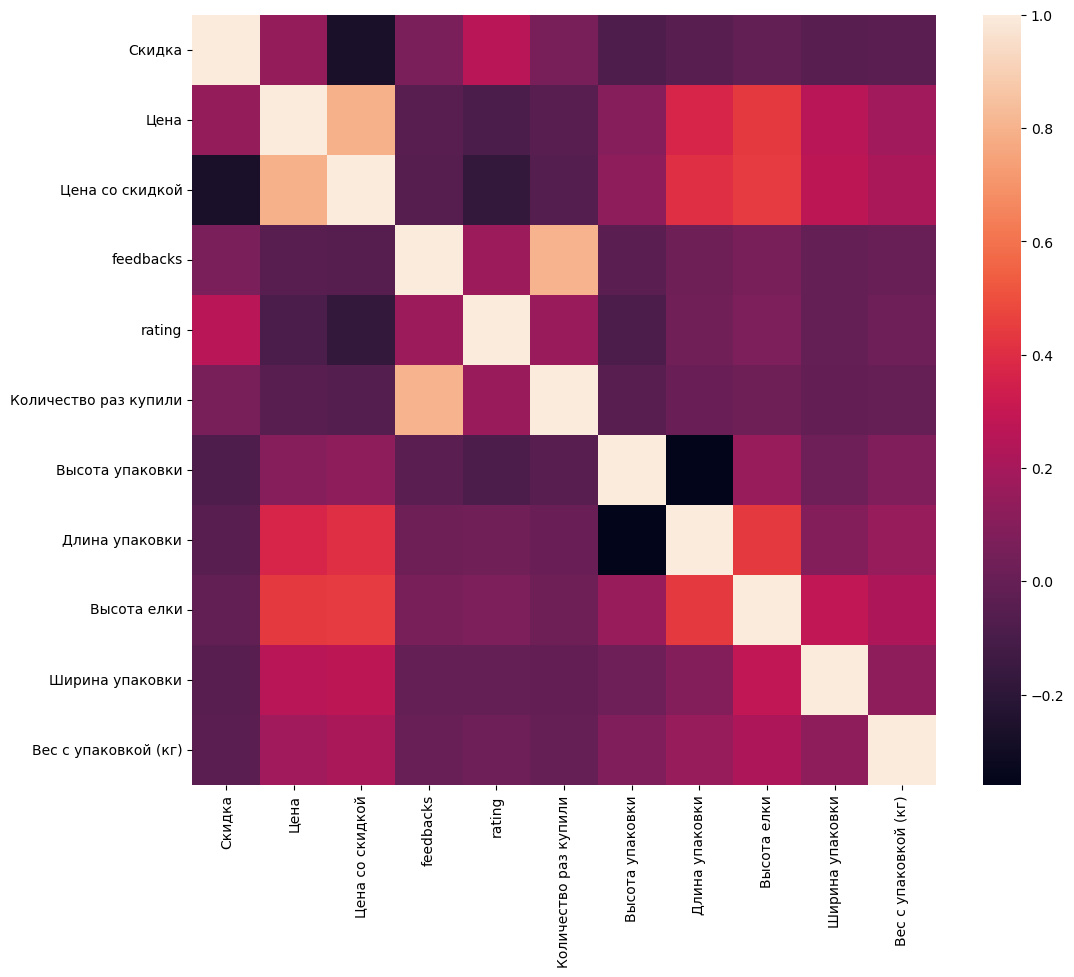

In [98]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame.from_records(df[num_cols]).corr())
plt.savefig(f'Тепловая карта корреляции.png')
None

In [79]:
df[num_cols].describe()

Скидка           Цена  Цена со скидкой     feedbacks       rating  \
count  6221.000000    6221.000000      6221.000000   6221.000000  6221.000000   
mean     36.502170   14486.889728      8568.281787     31.271339     1.756149   
std      26.593955   16302.087567     10042.424543    253.742765     2.260420   
min       0.000000     240.000000       150.000000      0.000000     0.000000   
25%      10.000000    3890.000000      2000.000000      0.000000     0.000000   
50%      36.000000    8990.000000      4711.000000      0.000000     0.000000   
75%      56.000000   19399.000000     11160.000000      4.000000     5.000000   
max      95.000000  208884.000000    100000.000000  10969.000000     5.000000   

       Количество раз купили  Высота упаковки  Длина упаковки  Высота елки  \
count            6221.000000      6221.000000     6221.000000  6221.000000   
mean               65.700852        40.835139       58.188876   144.034882   
std               537.910442        30.577349       36.138141    65.248821   
min                 0.000000         1.000000        2.000000     3.000000   
25%                 0.000000        20.000000       22.000000    90.000000   
50%                 0.000000        30.000000       60.000000   150.000000   
75%                 5.000000        45.000000       80.000000   180.000000   
max             21600.000000       210.000000      210.000000   500.000000   

       Ширина упаковки  Вес с упаковкой (кг)  
count      6221.000000           6221.000000  
mean         26.224417              4.877034  
std          15.789656             11.045233  
min           1.000000              0.040000  
25%          18.000000              1.500000  
50%          24.000000              4.425000  
75%          30.000000              7.000000  
max         120.000000            800.000000

In [92]:
num_cols_fig = [
 'Скидка',
 'Цена',
 'Цена со скидкой',
 'feedbacks',
 'rating',
 'Количество раз купили',
 'Высота елки']

D:\program\anakonda\lib\site-packages\seaborn\axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


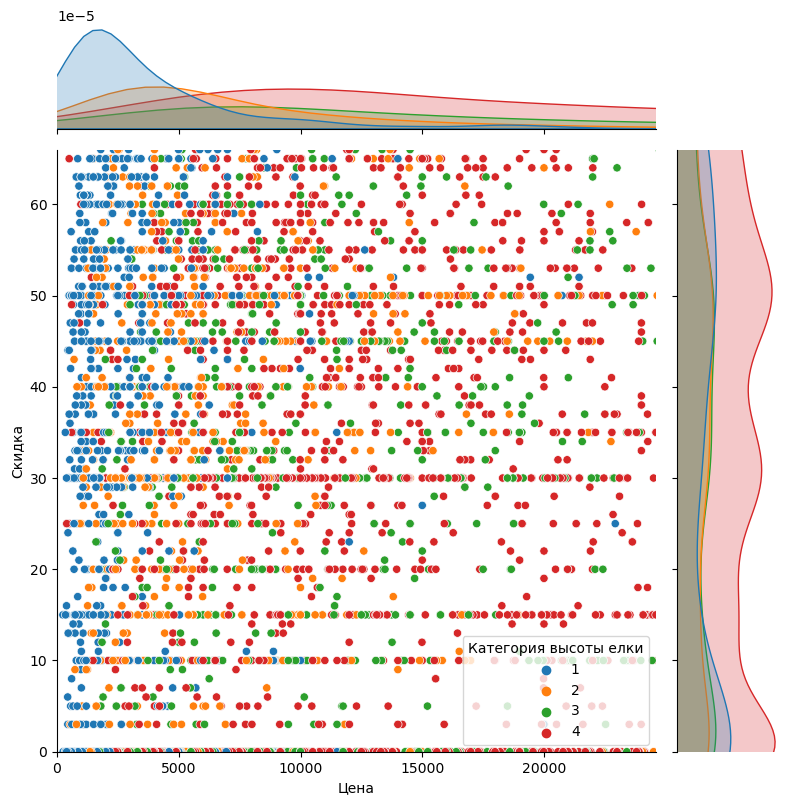

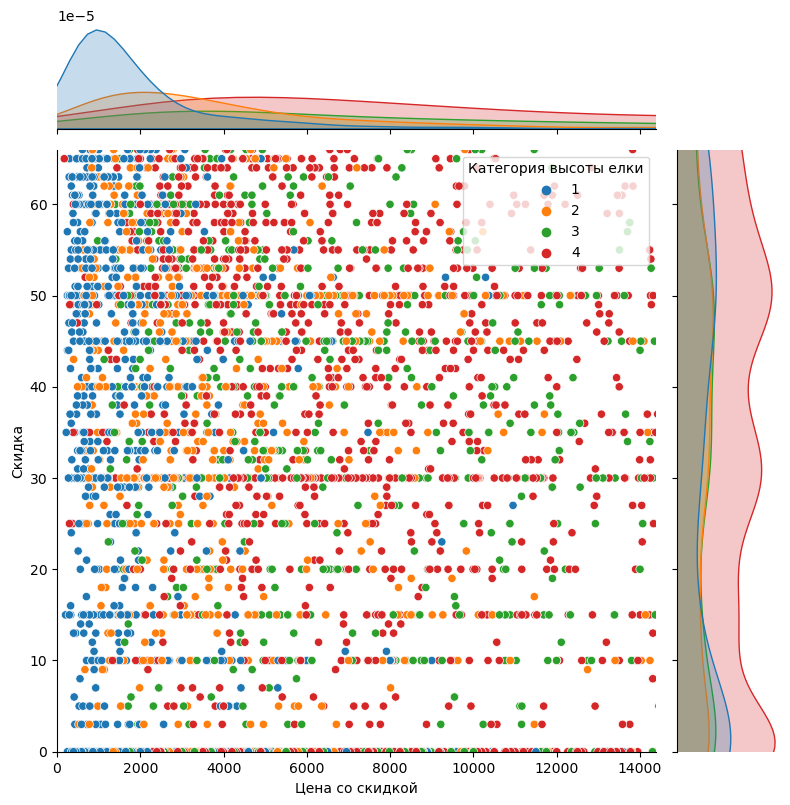

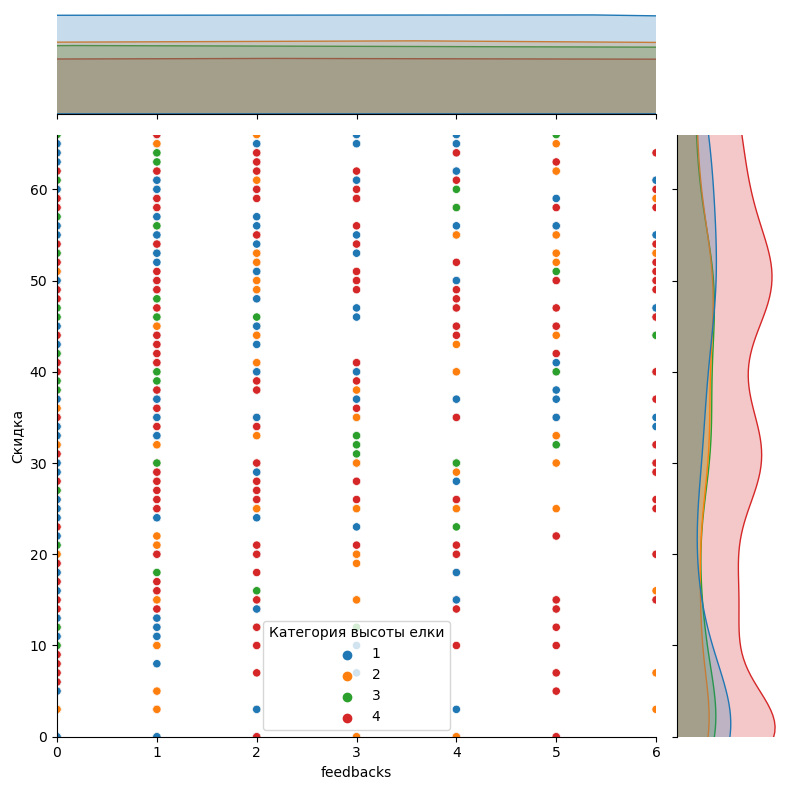

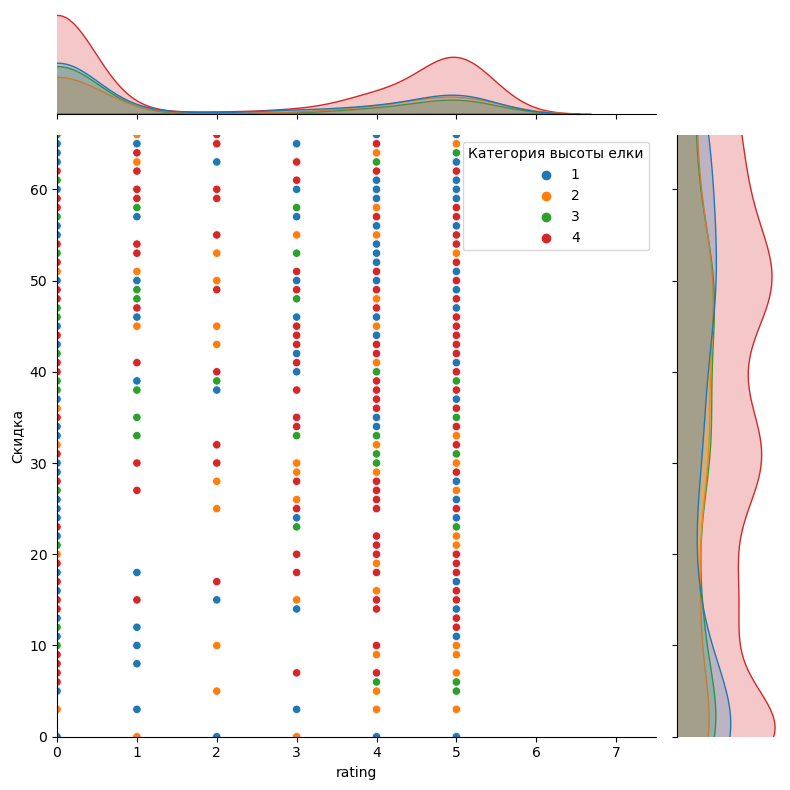

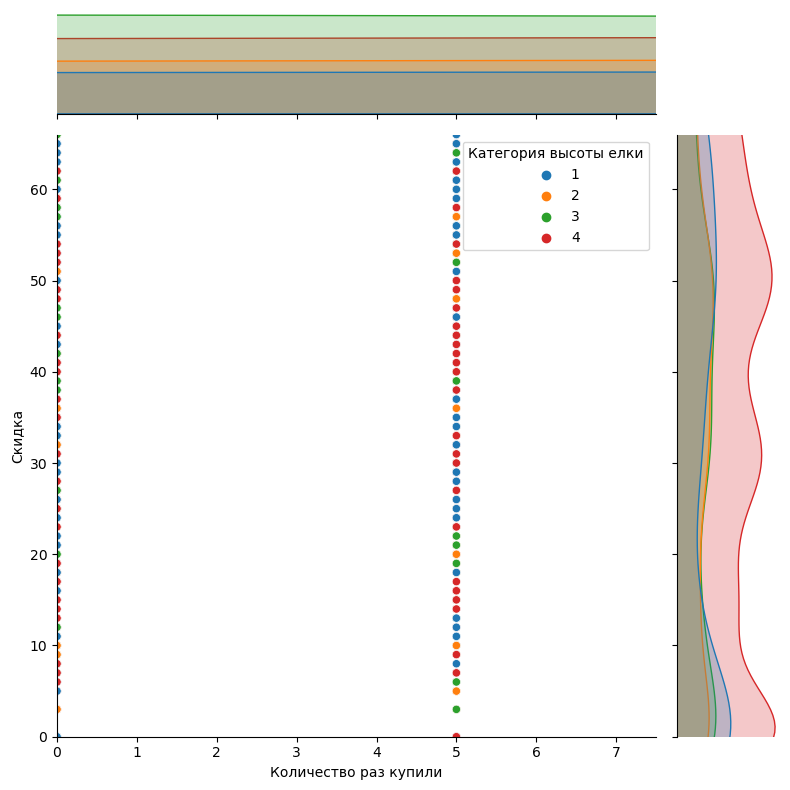

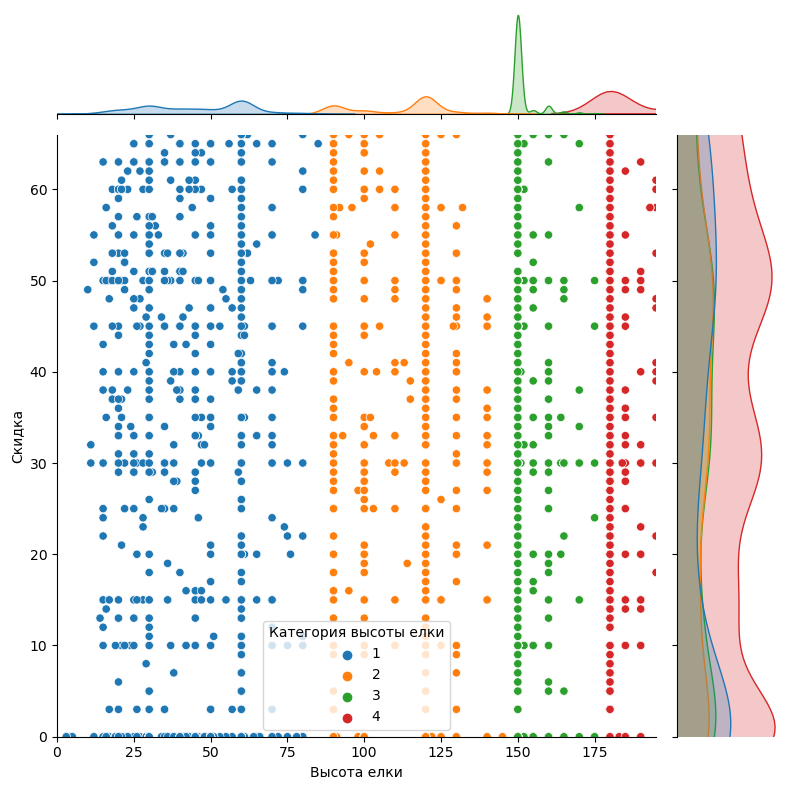

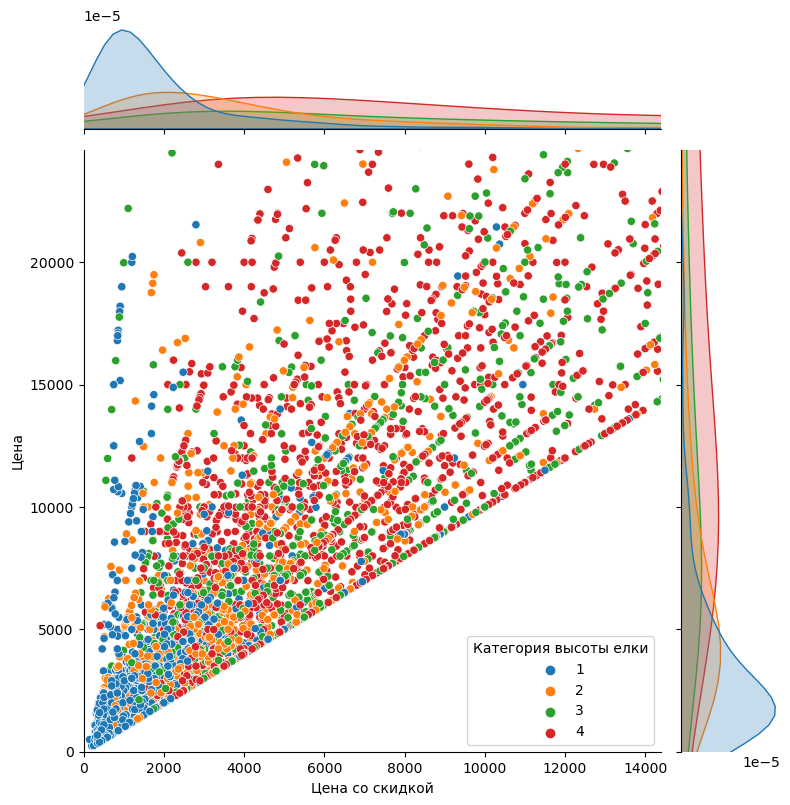

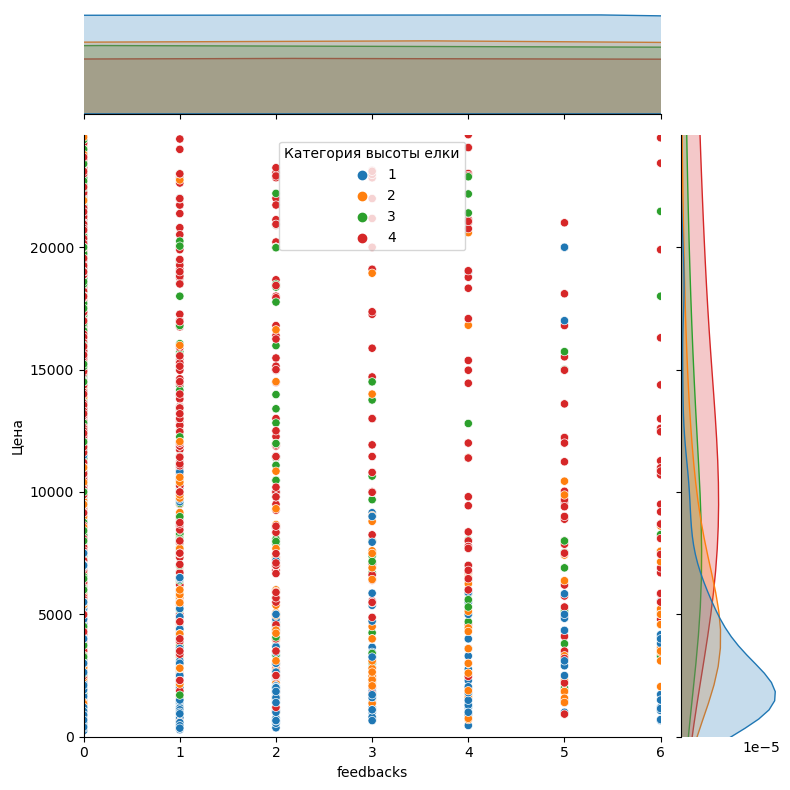

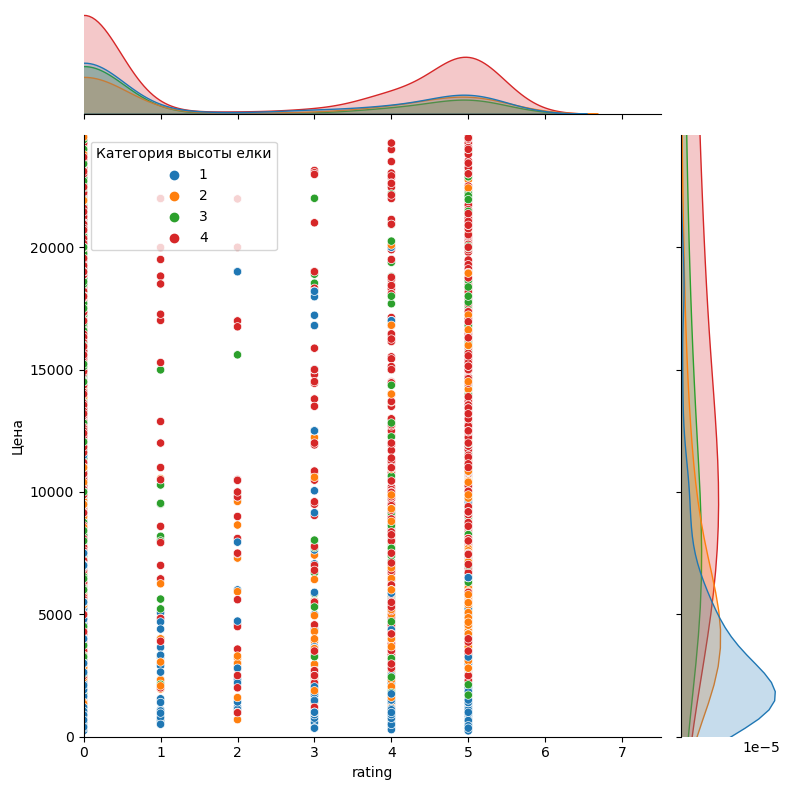

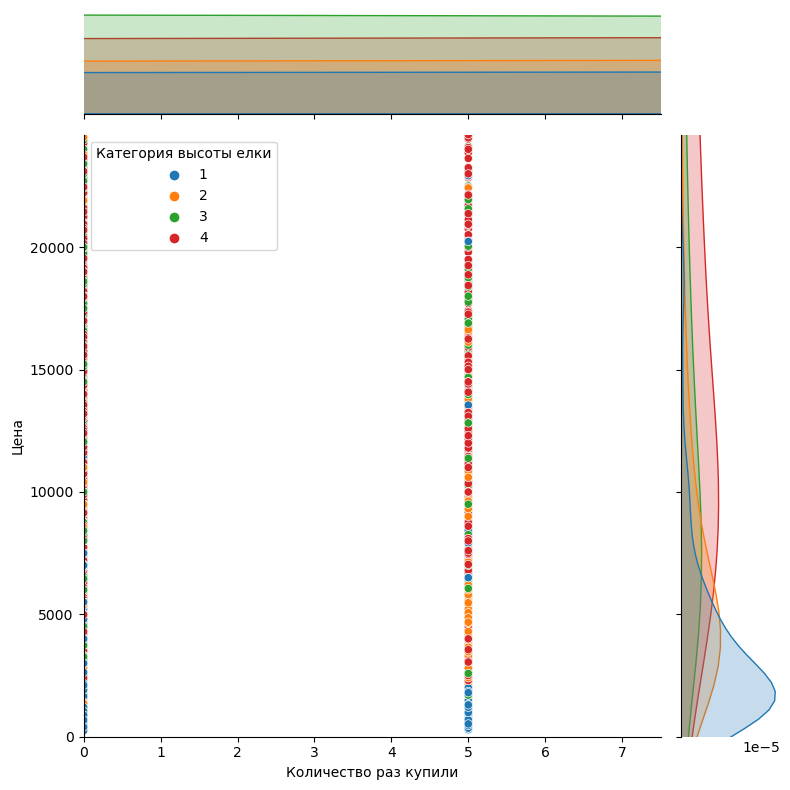

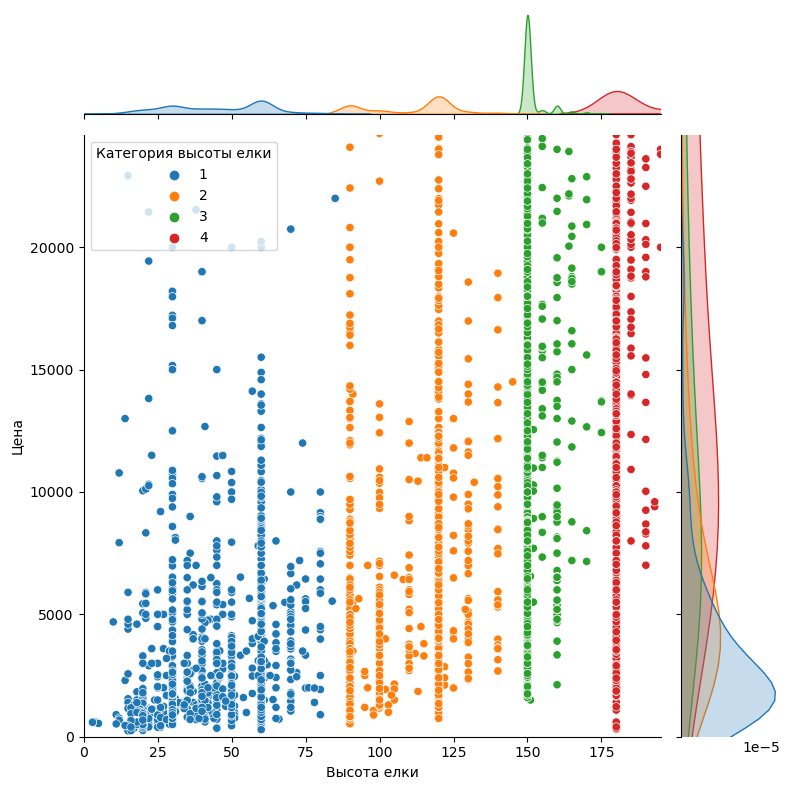

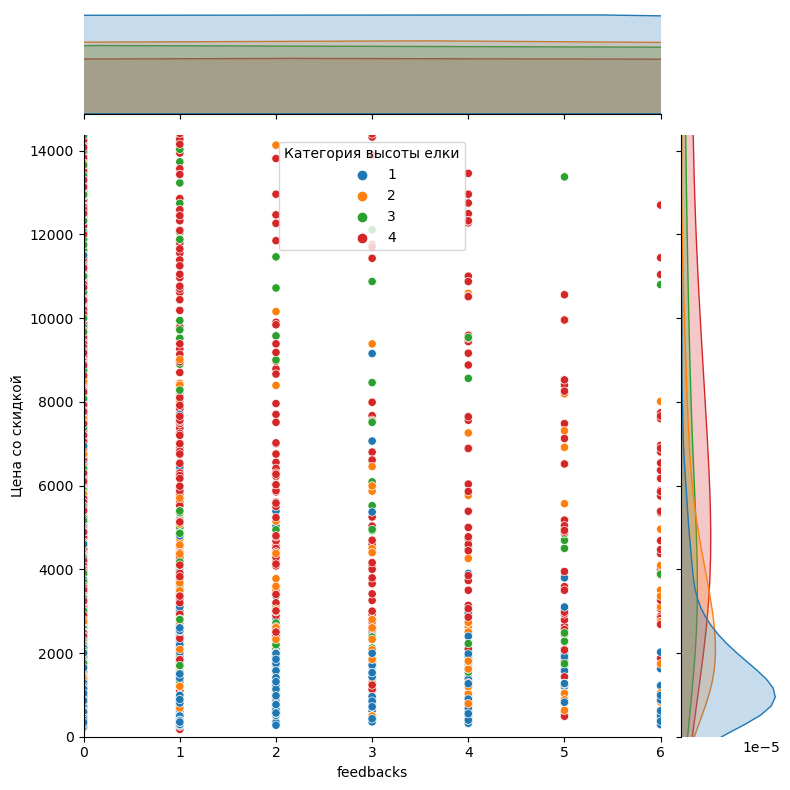

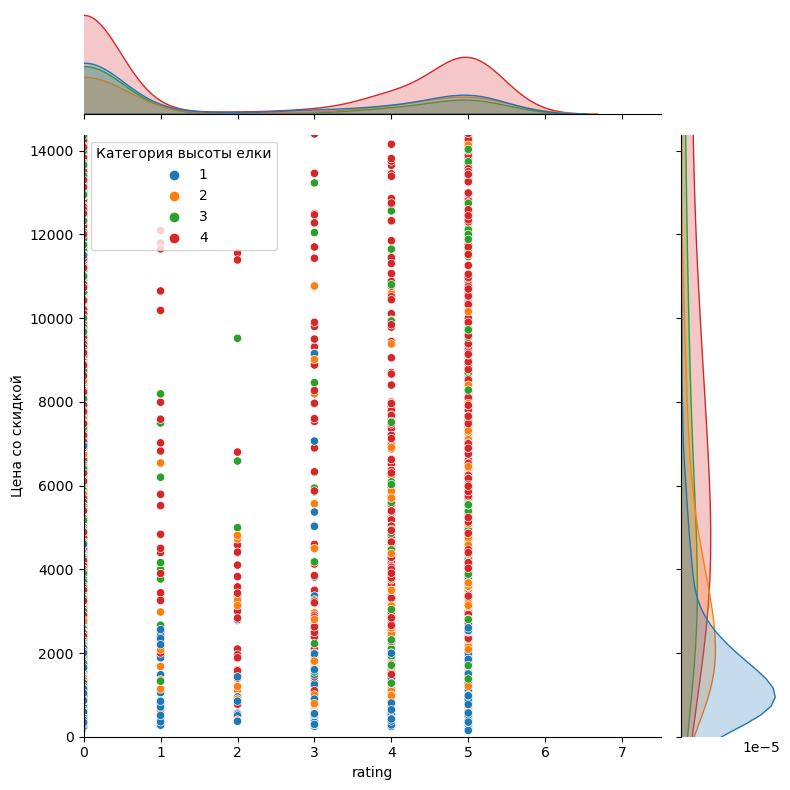

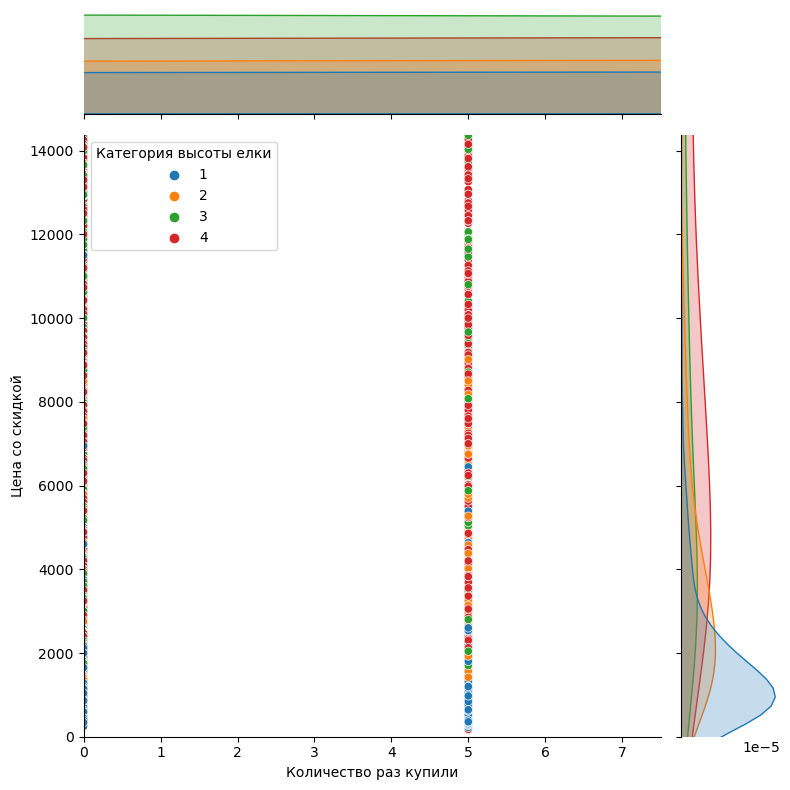

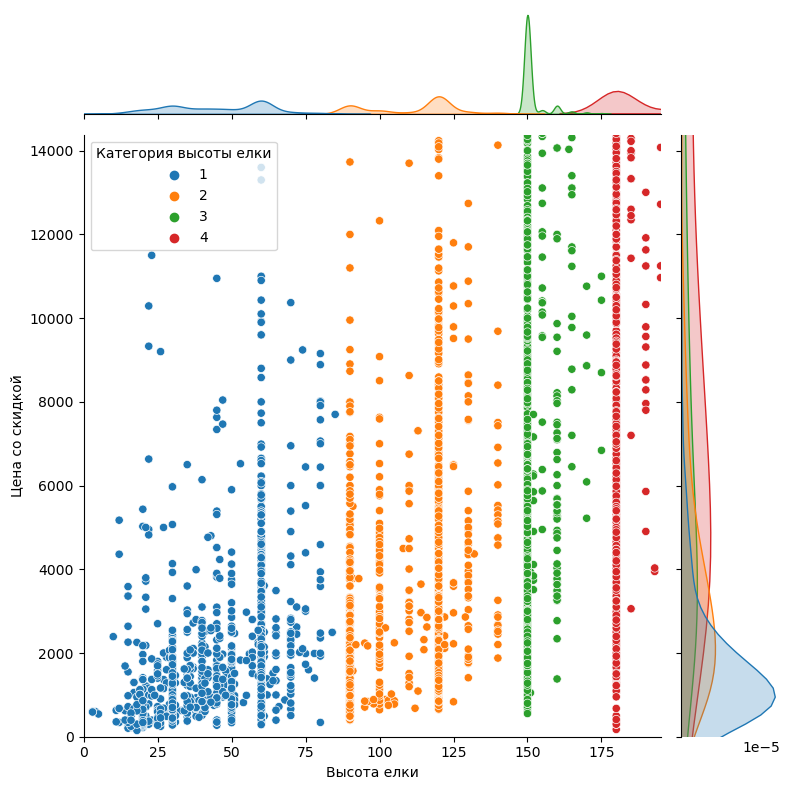

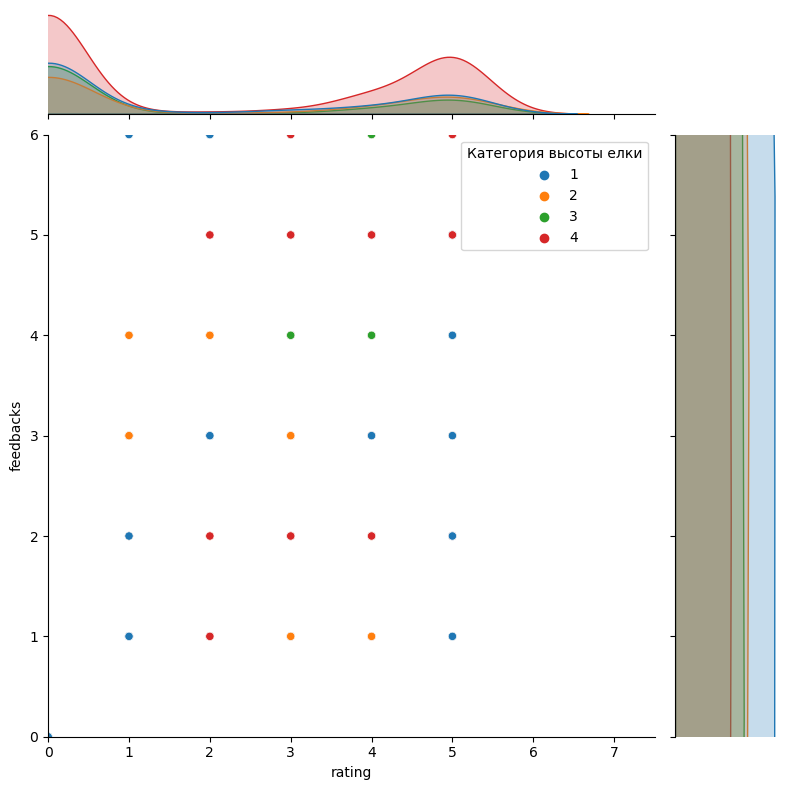

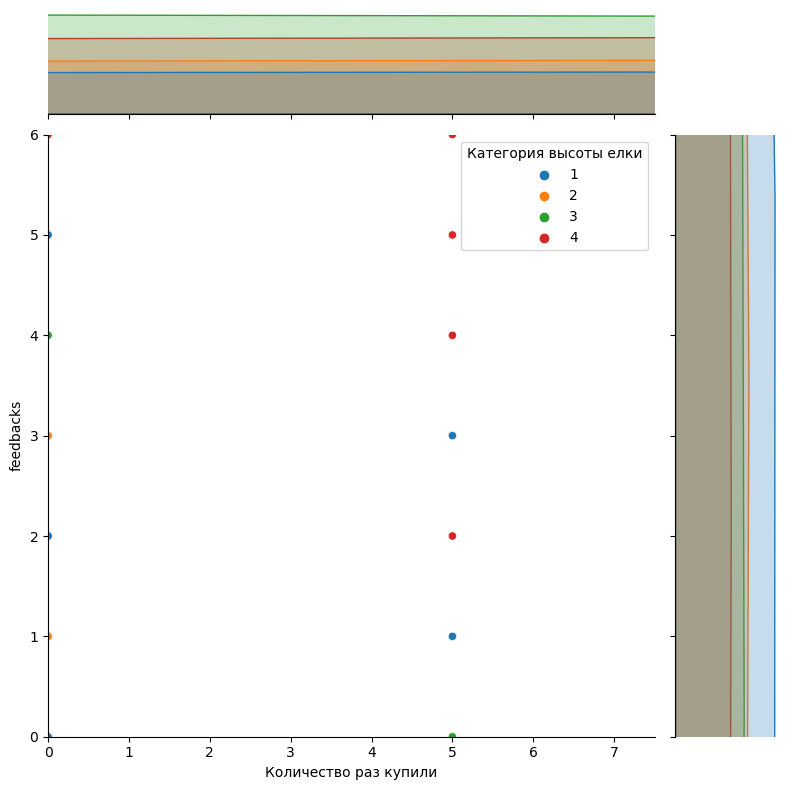

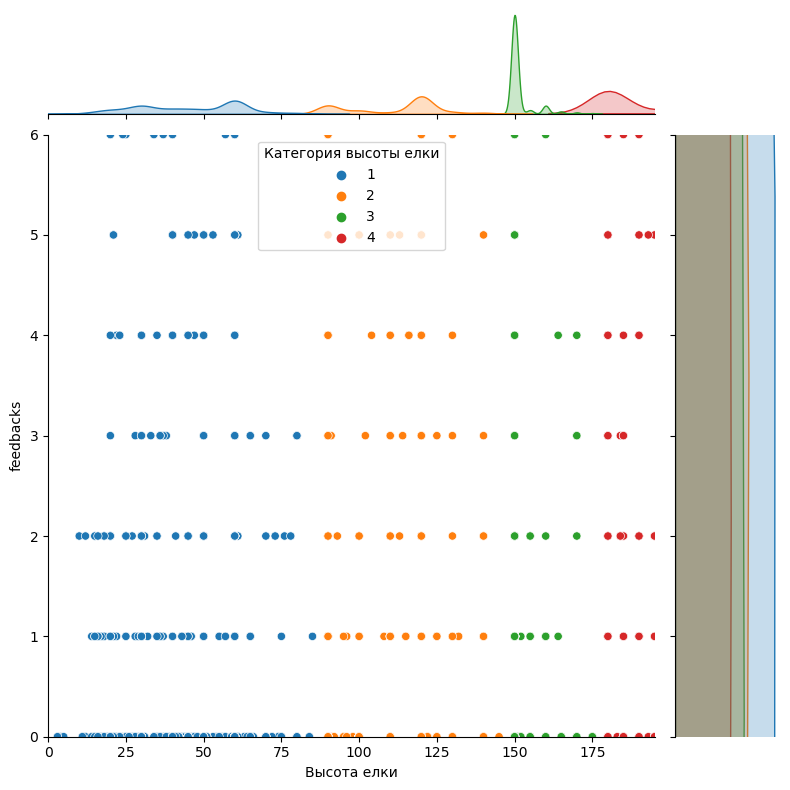

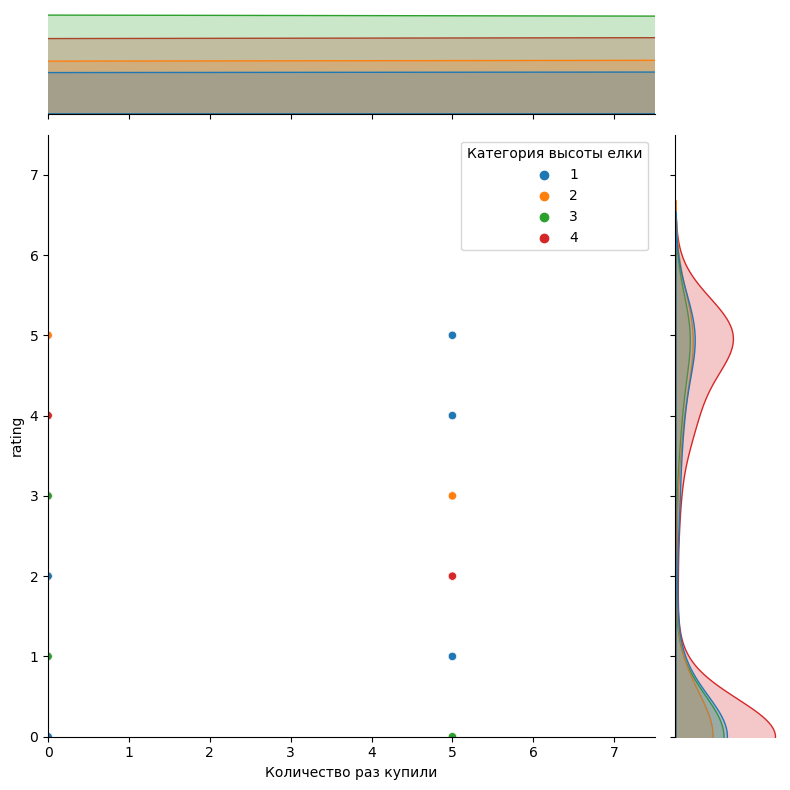

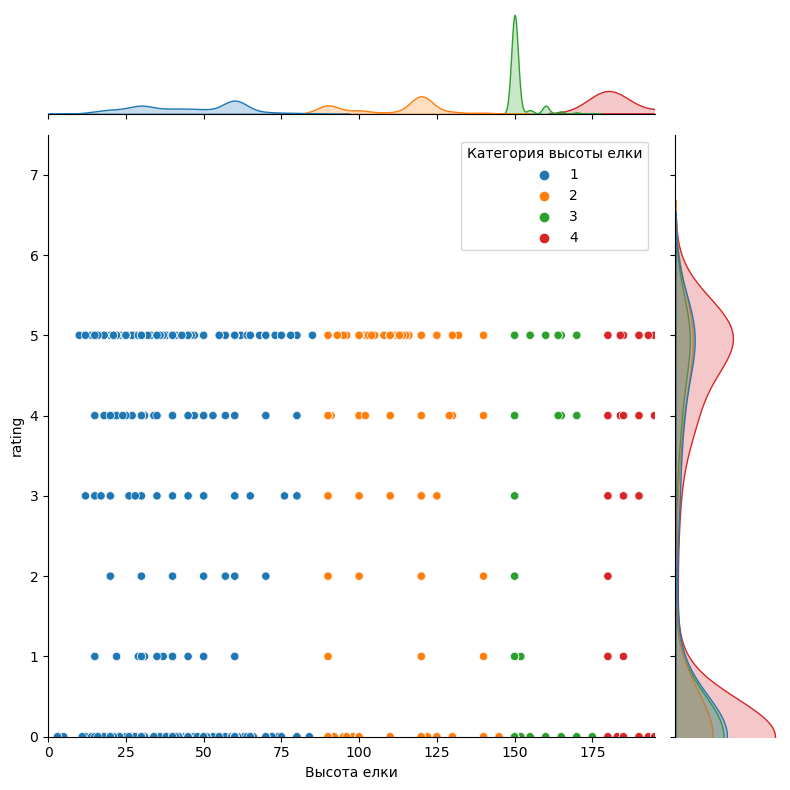

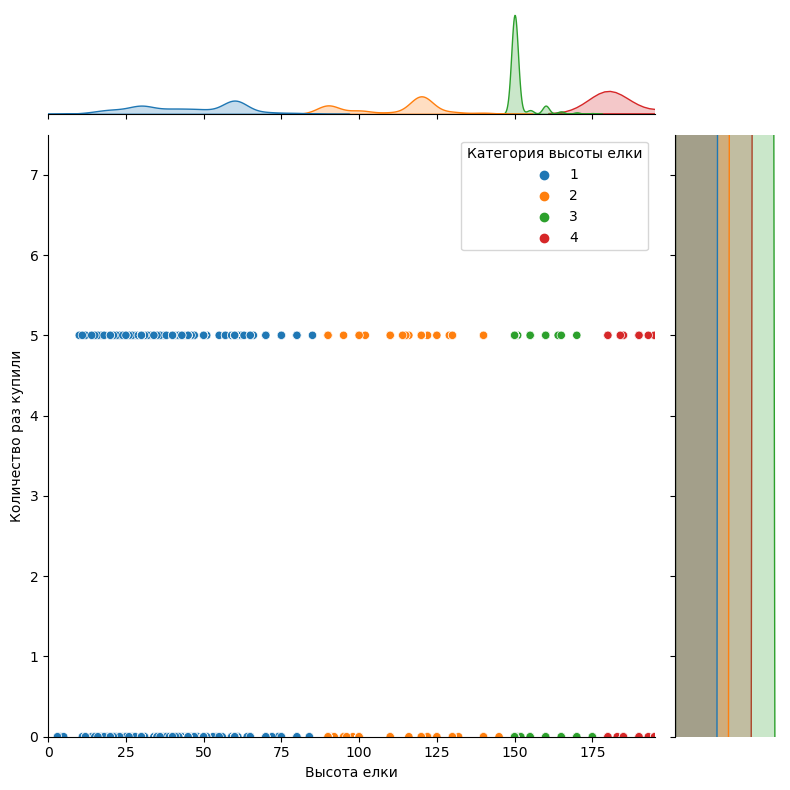

In [93]:
for j in ['Категория высоты елки']:
    for i in combinations(num_cols_fig, 2):
        jointplot = sns.jointplot(
            data=df, 
            x=i[1], 
            y=i[0],
            hue=j,
            xlim = (0, (df[i[1]].describe()[-2]+(df[i[1]].describe()[-2]-df[i[1]].describe()[-3])/2)),
            ylim = (0, (df[i[0]].describe()[-2]+(df[i[0]].describe()[-2]-df[i[0]].describe()[-3])/2)),
            height=8,
            palette='tab10'
            )
        plt.savefig(f'Зависимость_{i[0]}_to_{i[1]}_в разрезе_категорий_высоты.png')
    


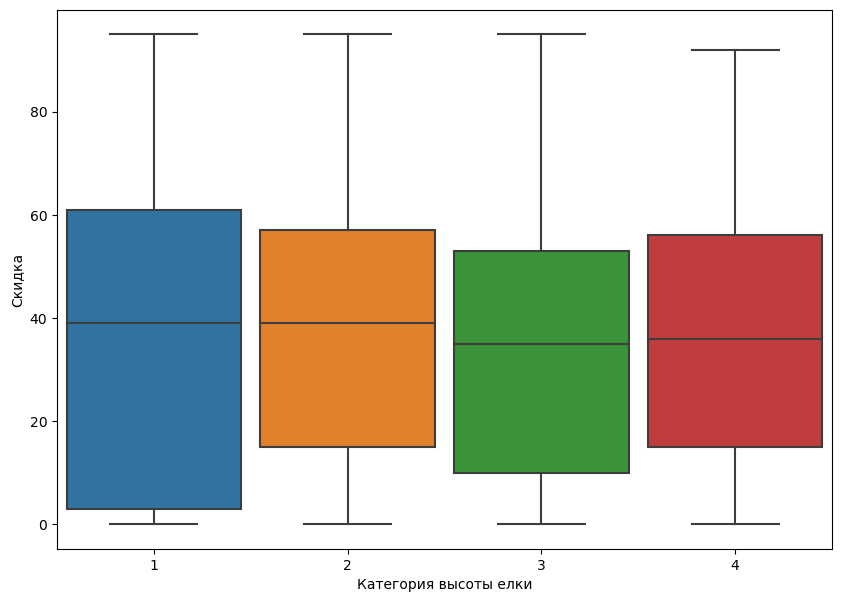

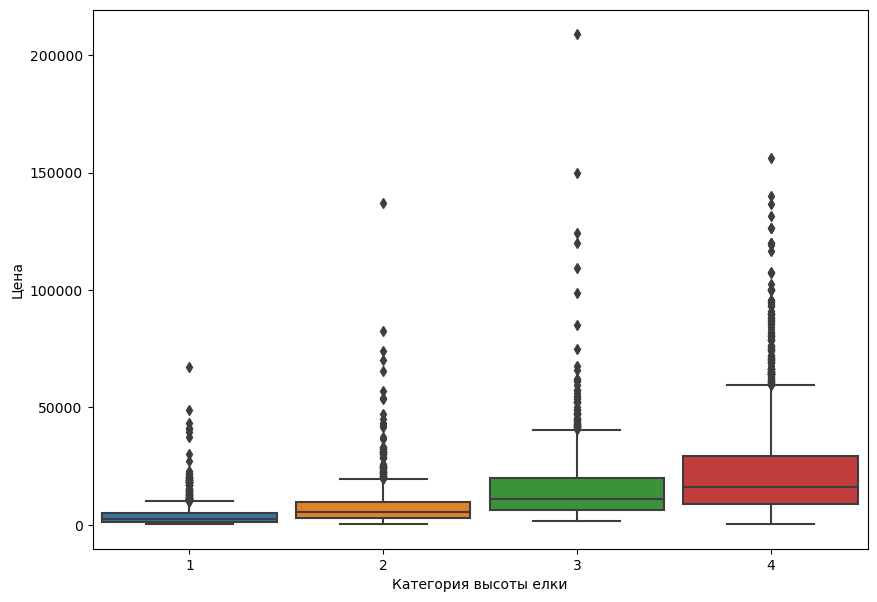

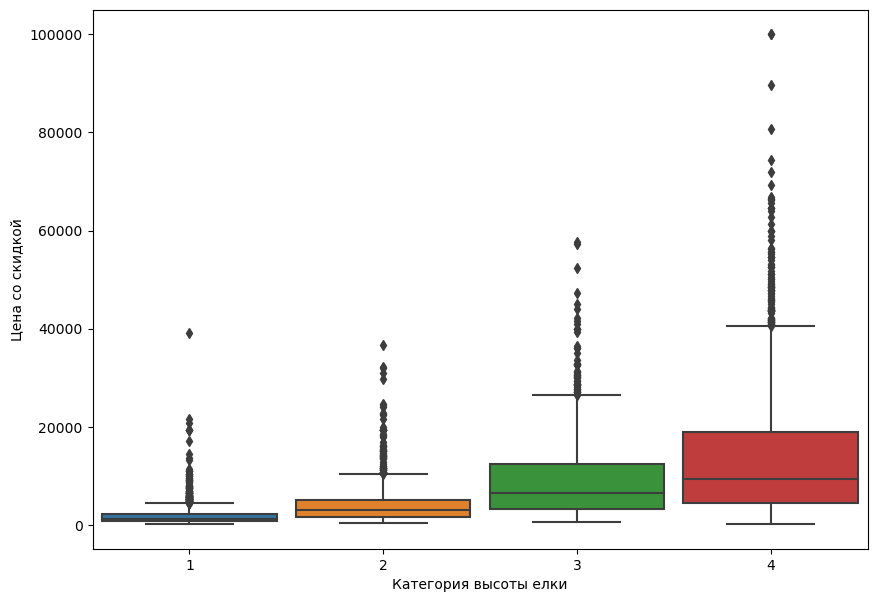

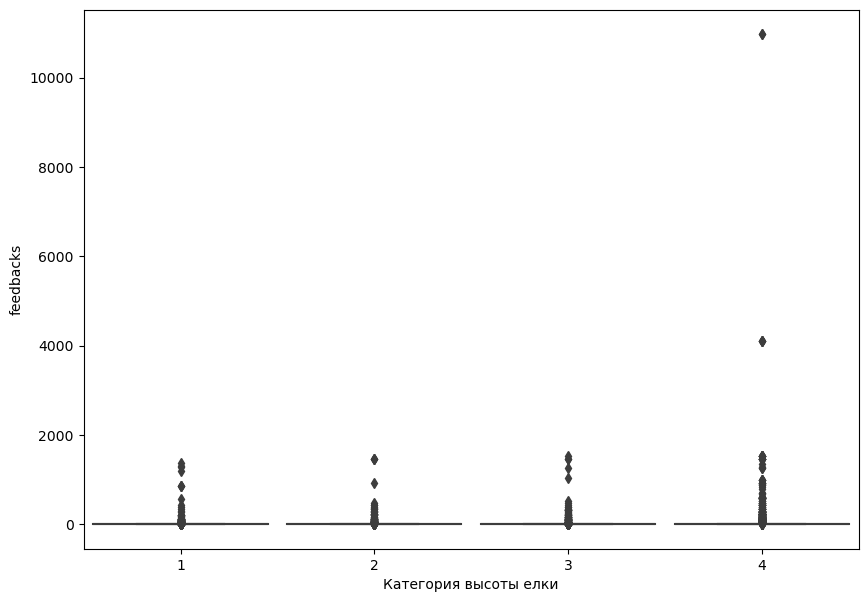

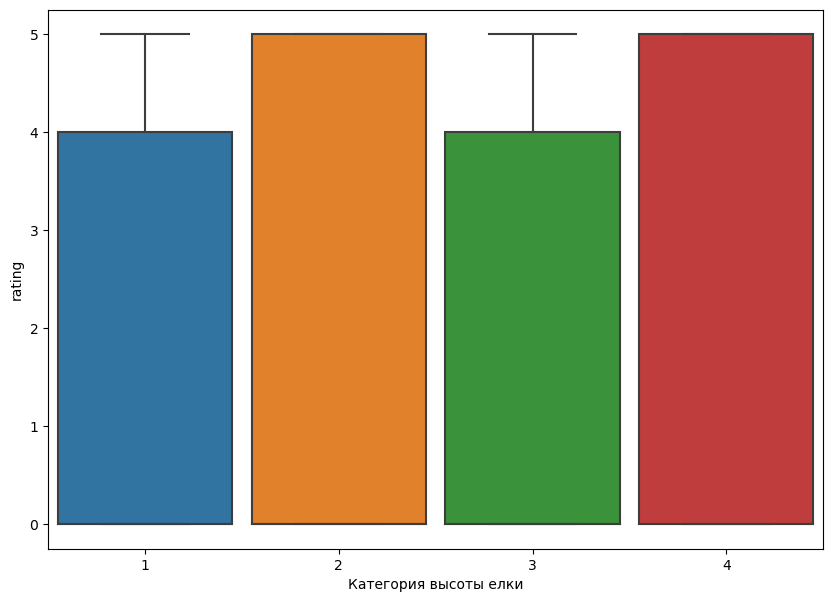

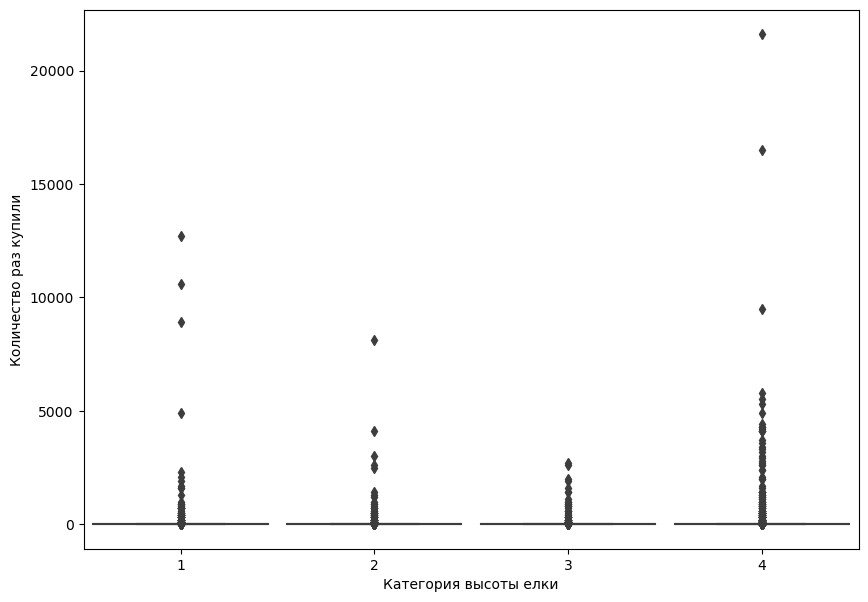

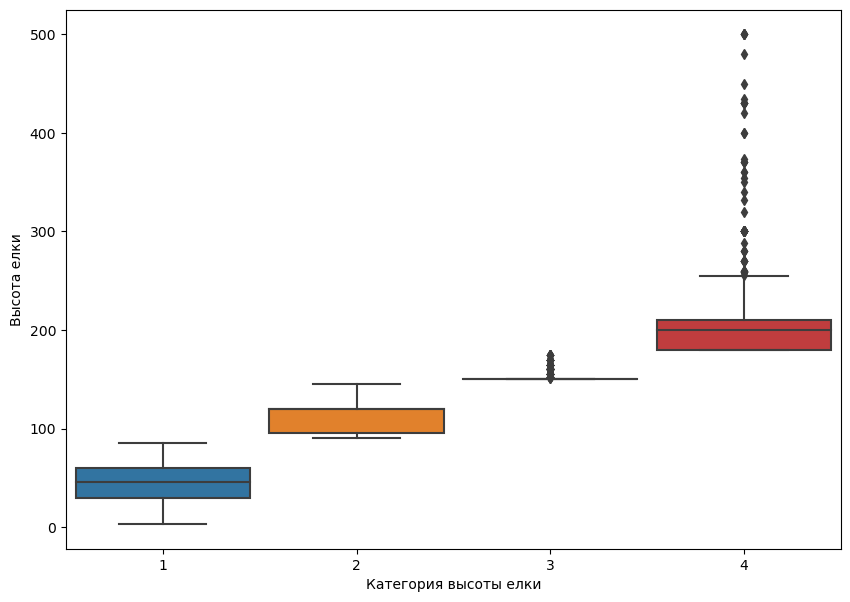

In [94]:
for i in num_cols_fig:
    fig = plt.figure(figsize=(10, 7))
    boxplot = sns.boxplot(
    data=df,
    x='Категория высоты елки',
    y=i,
    orient='v',
    width=0.9
    )
    plt.savefig(f'Коробчатая диаграмму для признака {i} в разрезе_категорий_высоты.png')
    

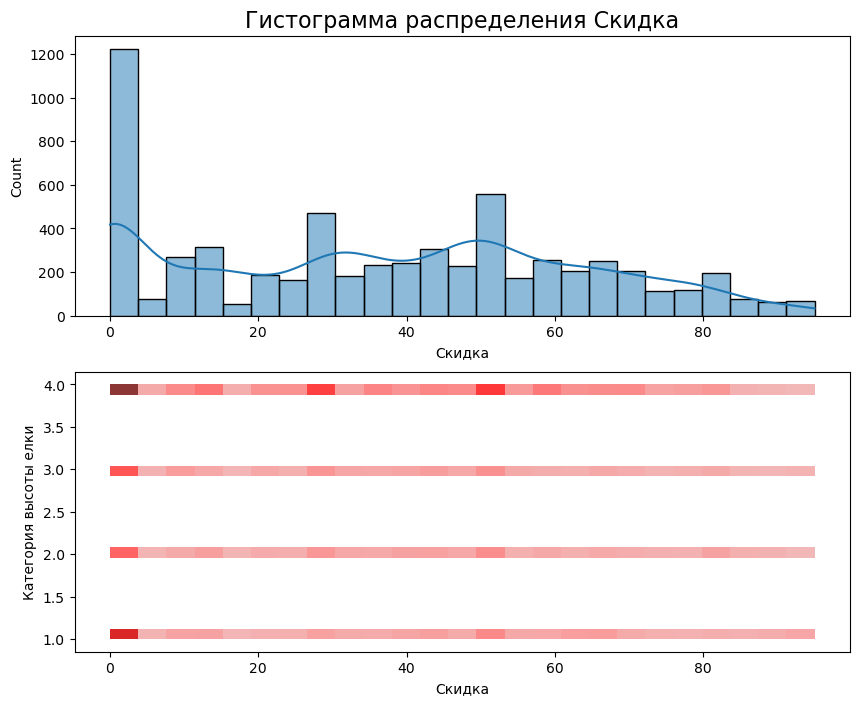

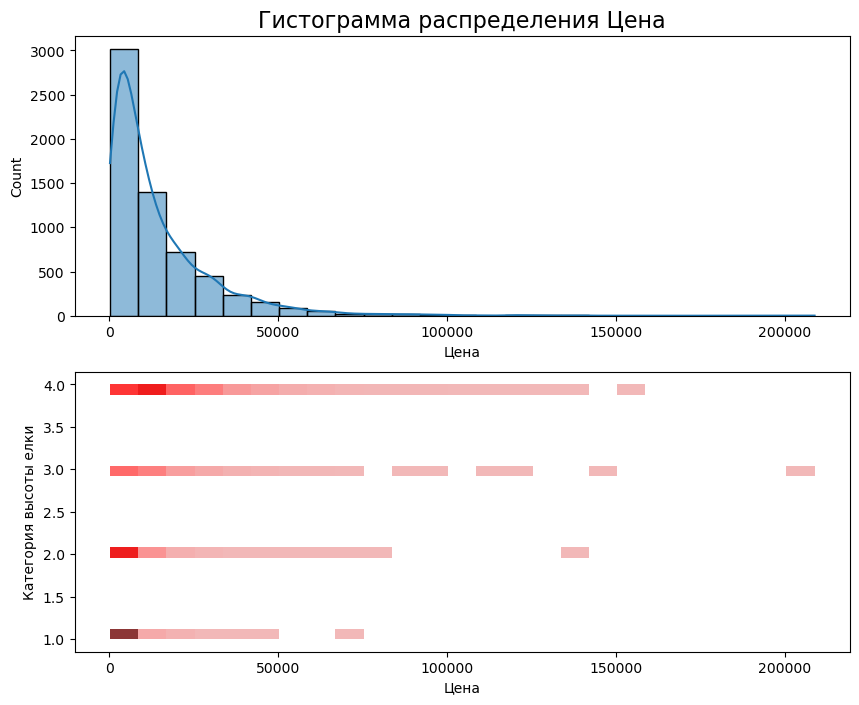

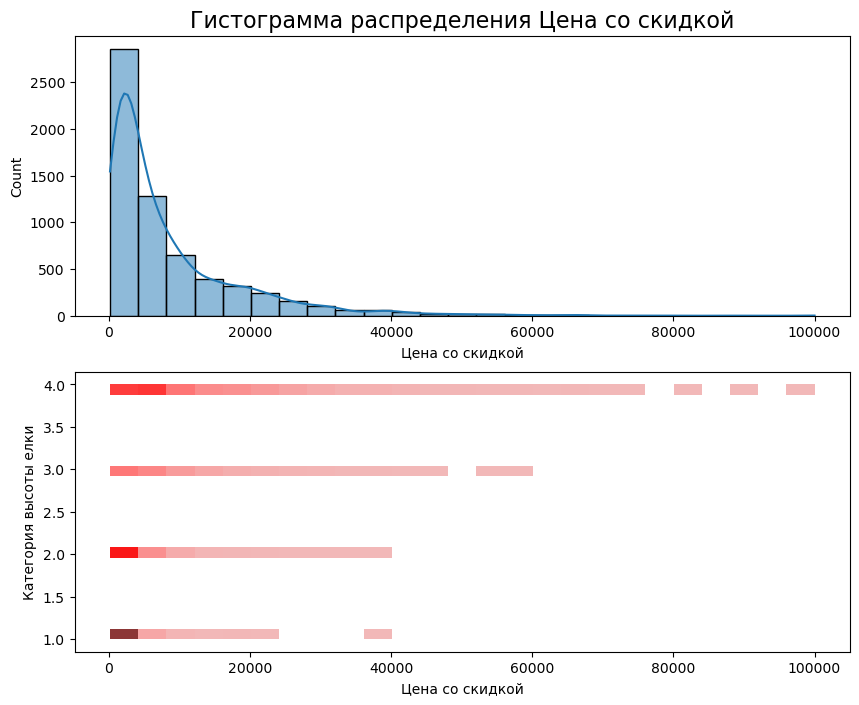

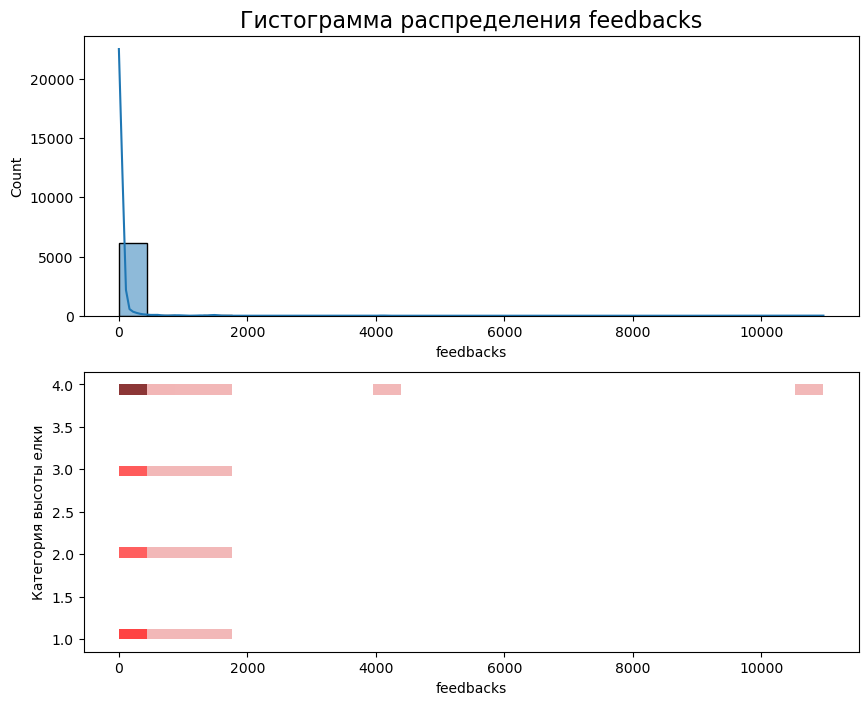

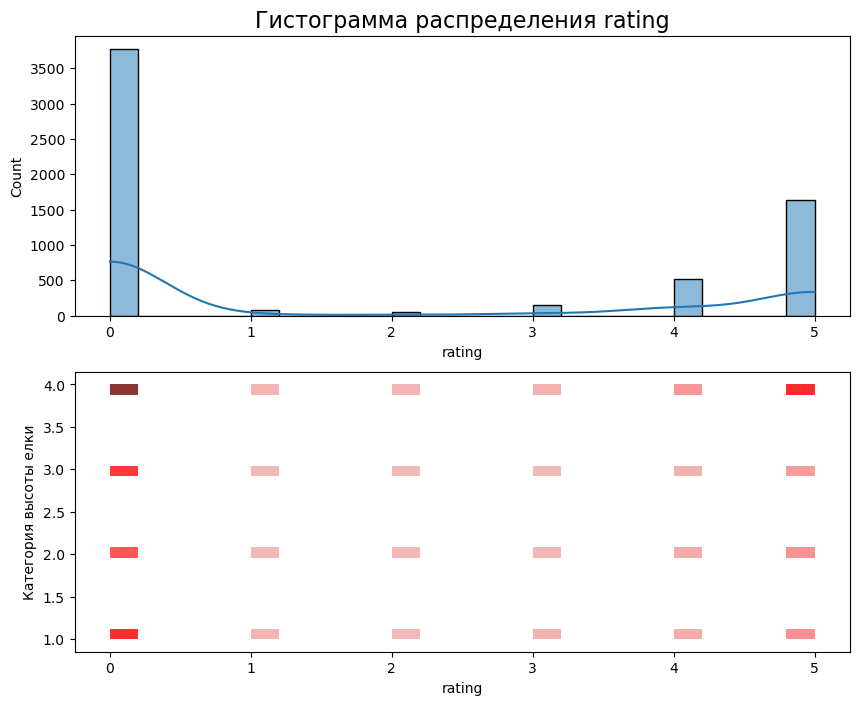

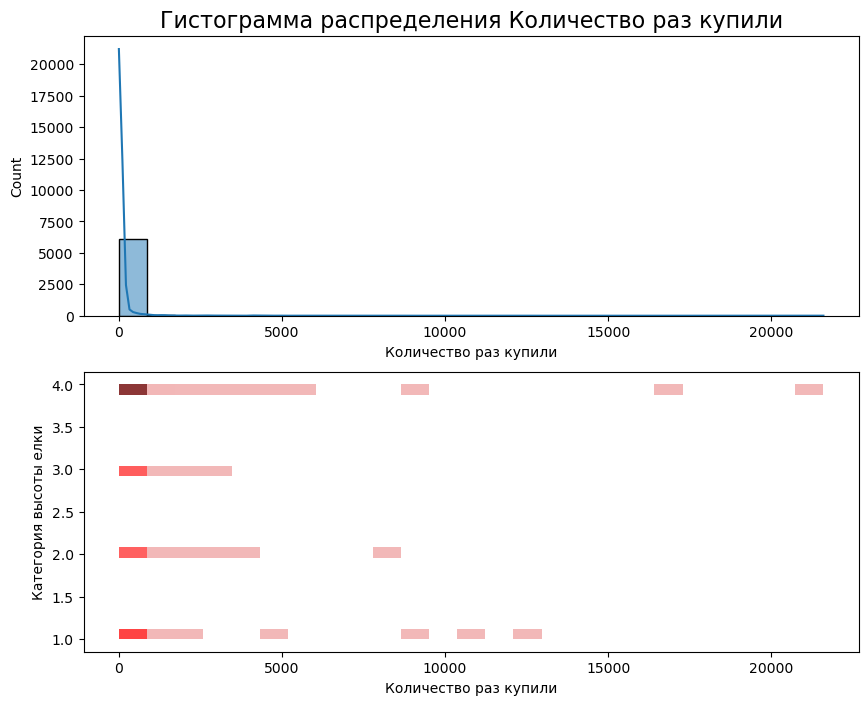

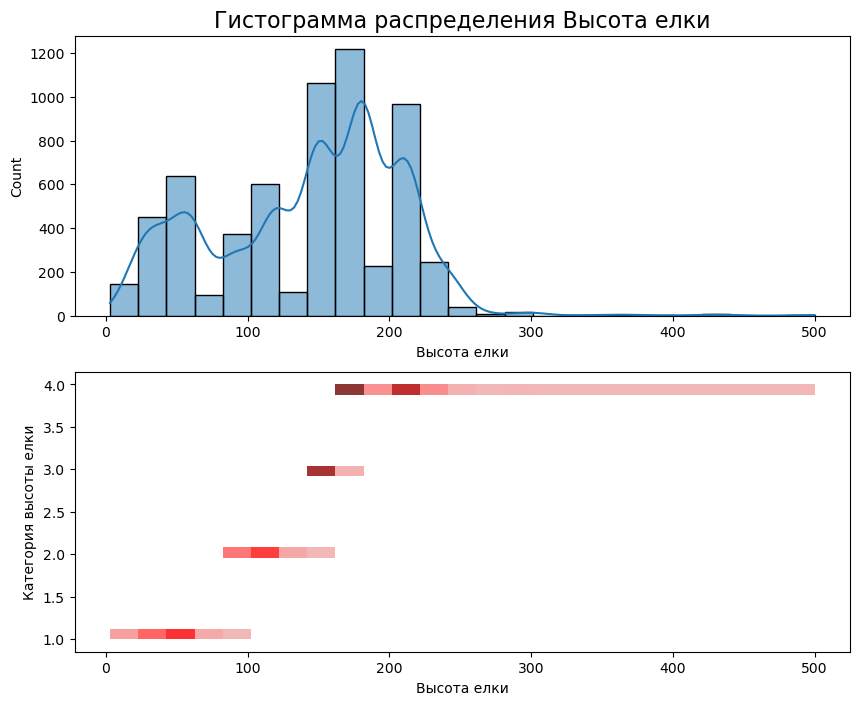

In [97]:
for i in num_cols_fig:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    sns.histplot(
        data=df,
        x=i,
        bins=25,
        kde=True,
        ax=axes[0]
    );
    axes[0].set_title(f'Гистограмма распределения {i}', fontsize=16)
    sns.histplot(
        data=df,
        x=i,
        y='Категория высоты елки',
        bins=25,
        color='red',
        ax=axes[1]
    );
    plt.savefig(f'Гистограмма распределения {i}.png')


#### Каких либо нелогичных зависимостей не было обнаруженно, поэтому для кластеризации оставим не габаритные числовые признаки

In [291]:
num_cols = [
 'Скидка',
 'Цена',
 'Цена со скидкой',
 'feedbacks',
 'rating',
 'Количество раз купили',
]

In [292]:
data=df[num_cols]

#### Построим диаграммы прологарифмированного распределения признаков

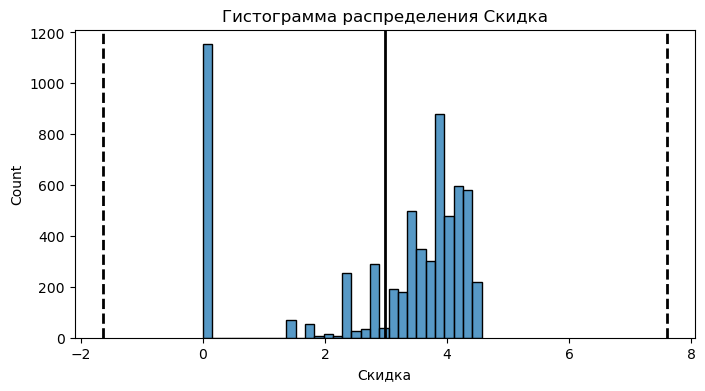

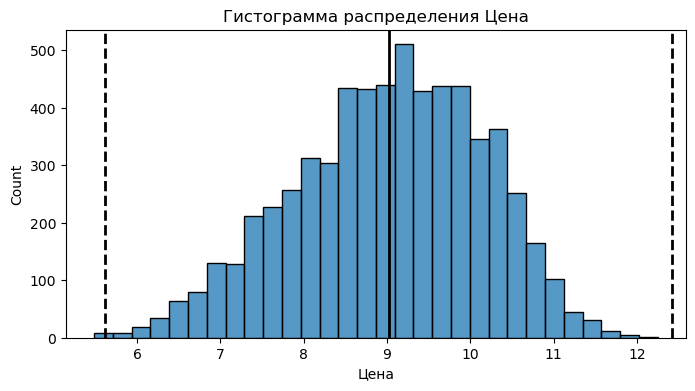

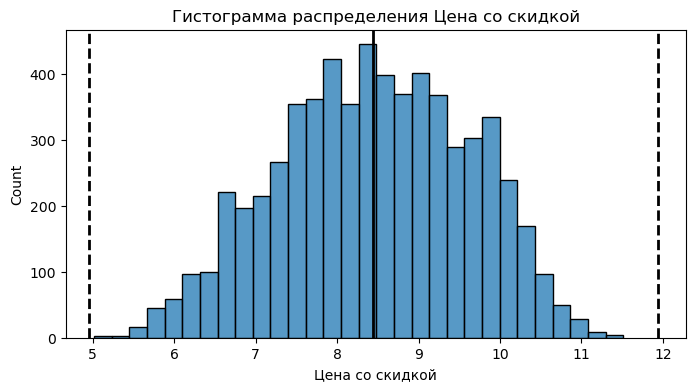

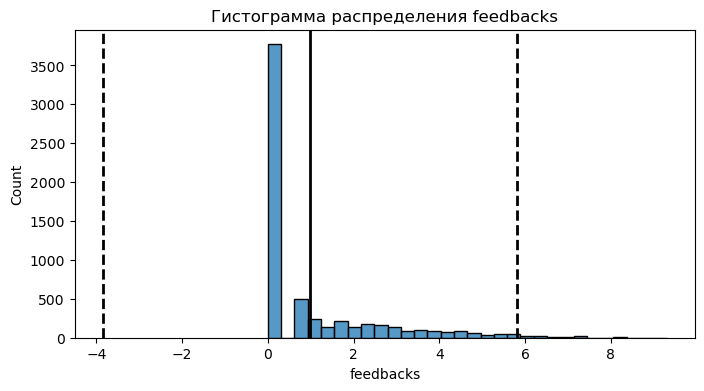

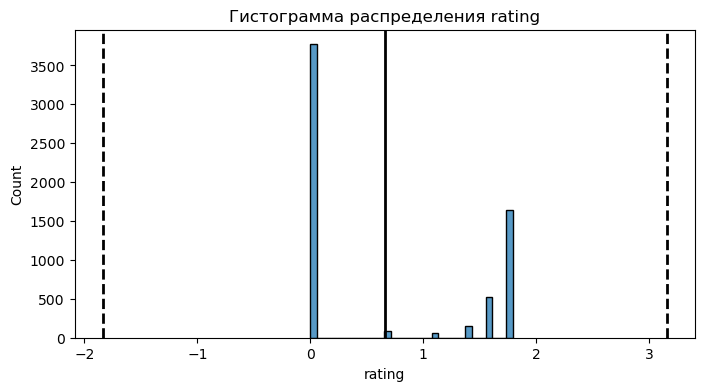

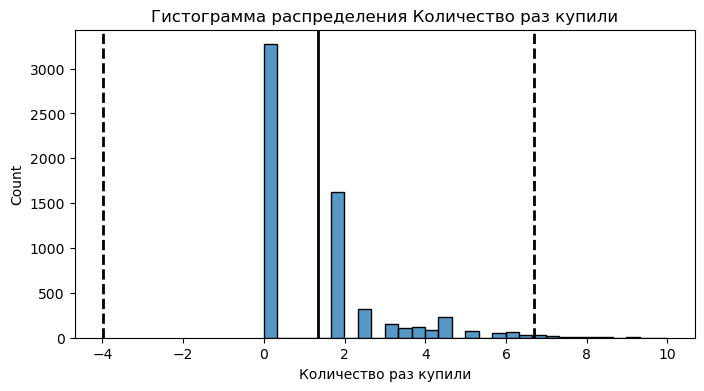

In [293]:
for i in num_cols:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    log_mkad_km = np.log(data[i] + 1)
    histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
    histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
    histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
    histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
    histplot.set_title(f'Гистограмма распределения {i}');

#### Очистим выбросы по правилу трех сигм

In [294]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [295]:
for i in num_cols:    
    outliers, data = outliers_z_score_mod(data, i, left=3, right=3, log_scale=True)
    print(f'Число выбросов {i} по методу z-отклонения: {outliers.shape[0]}')
    print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов Скидка по методу z-отклонения: 0
Результирующее число записей: 6118
Число выбросов Цена по методу z-отклонения: 3
Результирующее число записей: 6118
Число выбросов Цена со скидкой по методу z-отклонения: 0
Результирующее число записей: 6118
Число выбросов feedbacks по методу z-отклонения: 120
Результирующее число записей: 6118
Число выбросов rating по методу z-отклонения: 0
Результирующее число записей: 6118
Число выбросов Количество раз купили по методу z-отклонения: 93
Результирующее число записей: 6118


## Произведем Кластеризацию DBSCAN

Кластеризация DBSCAN в машинном обучении
Алгоритм кластеризации DBSCAN основан на концепции образцов ядра, неосновных образцов и выбросов:

- Образцы ядра: образцы, представленные в области с высокой плотностью, имеют минимальное количество точек выборки с радиусом eps.
- Образцы не ядра: образцы близкие к образцам ядра, но не являющиеся образцами ядра, а находящиеся очень близко к образцам ядра. Образцы не ядра лежат в радиусе eps от образцов ядра, но у них нет минимальных точек отбора проб.
- Выбросы: образцы, которые не являются частью образцов ядра и образцов не ядра, и находящиеся далеко от всех образцов.
 

Алгоритм кластеризации DBSCAN работает хорошо, если все кластеры достаточно плотны и хорошо представлены областями с низкой плотностью.

#### Промасштабируем и нормализуем набор данных:

In [297]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

#### Реализую алгоритм анализа главных компонентов (PCA) , чтобы уменьшить размерность данных для визуализации:

In [298]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0  0.622075  0.188450
1  0.660318 -0.054810
2  0.899765 -0.382277
3  1.053283  0.091549
4  0.600882 -0.153040


#### Реализуем алгоритм DBSCAN и посмотрим на данные и кластеры после его реализации:



In [299]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_

In [300]:
z=(data['cluster']+1)/25

In [301]:
len(labels)

6005

In [302]:
data['cluster'].unique()

array([ 0, 35, -1,  1,  3,  2,  4,  5,  6,  8,  7,  9, 10, 11, 27, 12, 13,
       14, 15, 16, 17, 31, 18, 19, 20, 57, 21, 22, 23, 24, 64, 25, 26, 28,
       29, 67, 63, 30, 32, 33, 34, 43, 45, 65, 36, 37, 38, 39, 40, 41, 61,
       62, 42, 48, 44, 70, 46, 71, 47, 72, 49, 51, 50, 52, 53, 54, 55, 56,
       68, 58, 59, 60, 66, 69], dtype=int64)

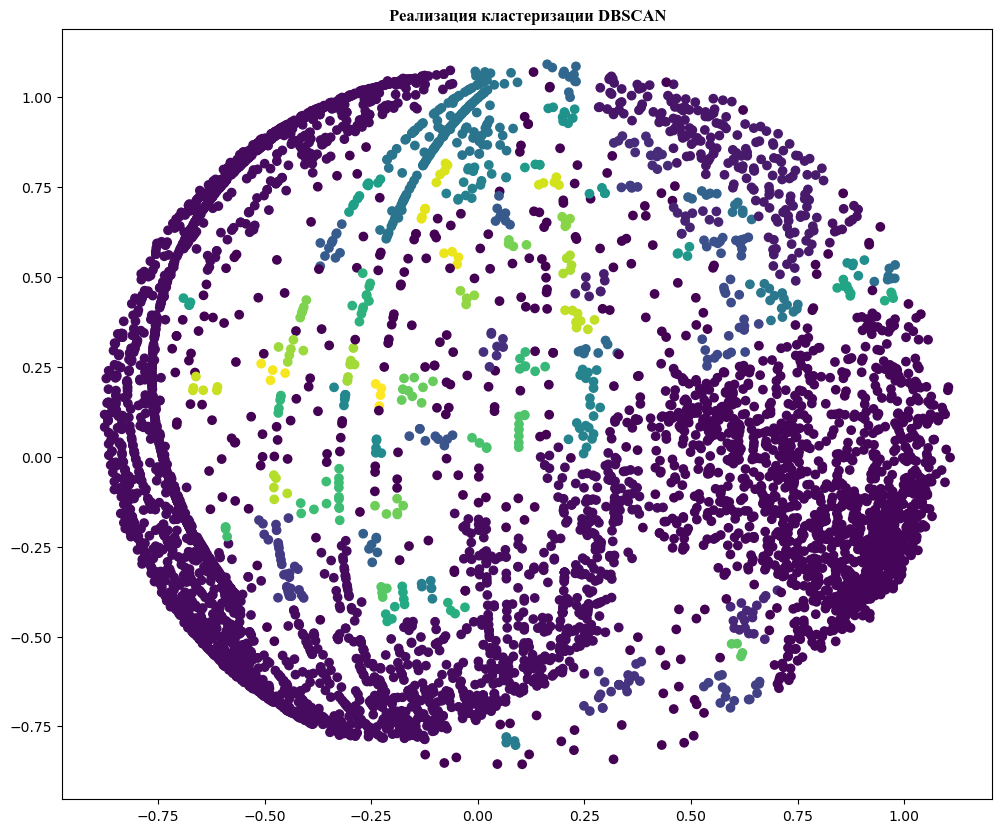

In [304]:
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=z)
plt.title("Реализация кластеризации DBSCAN", fontname="Times New Roman",fontweight="bold")
plt.savefig(f'Реализация кластеризации DBSCAN.png')

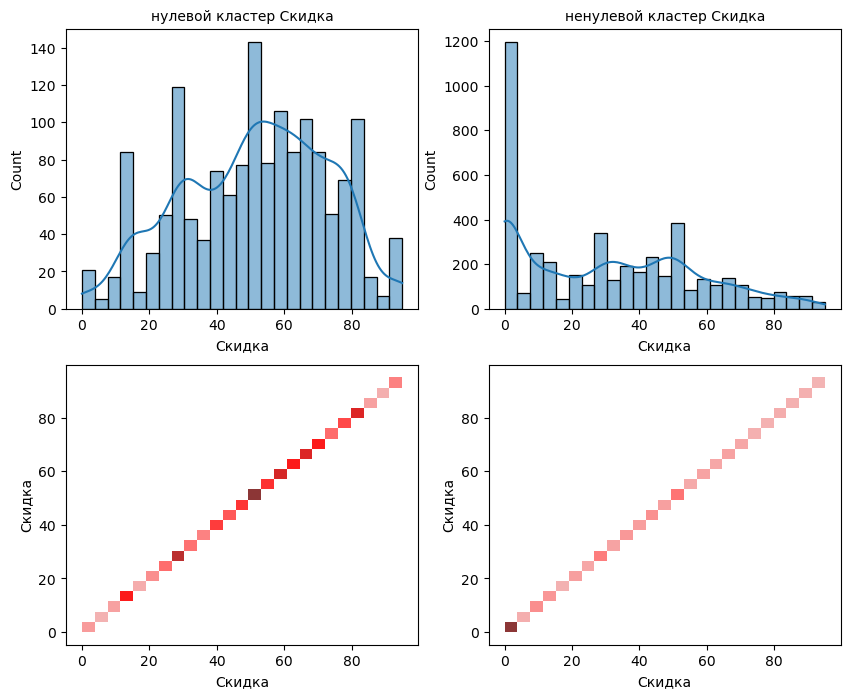

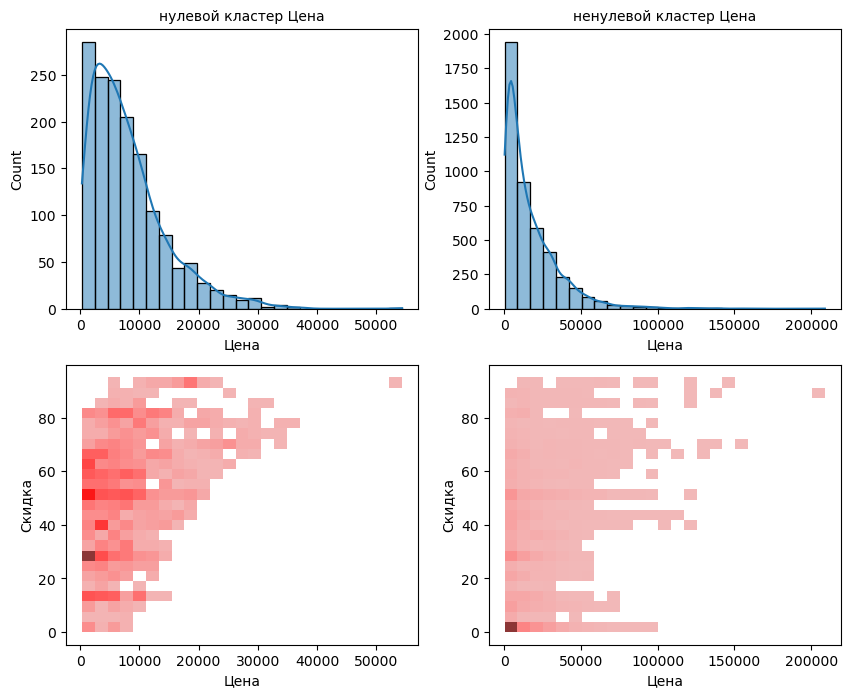

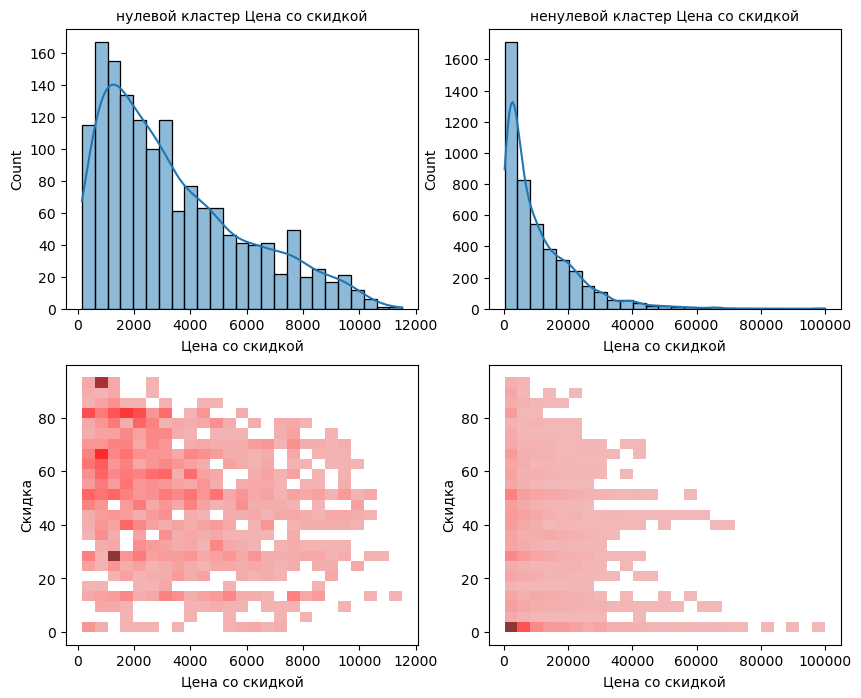

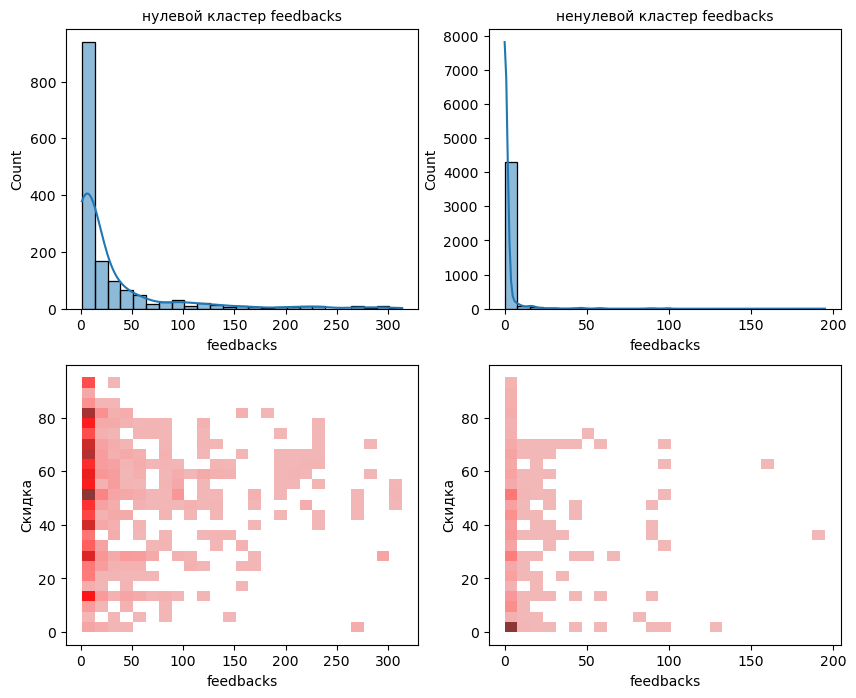

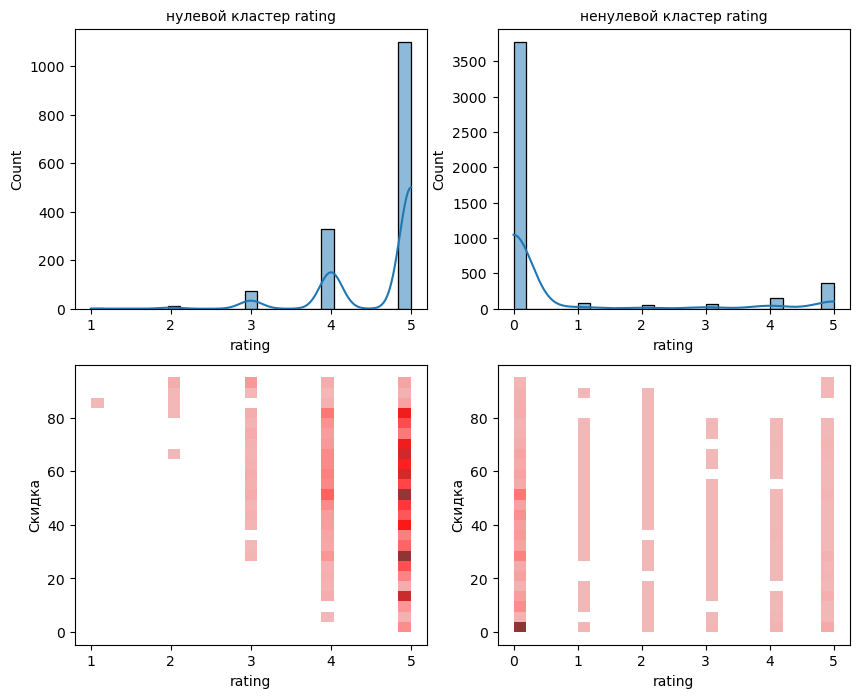

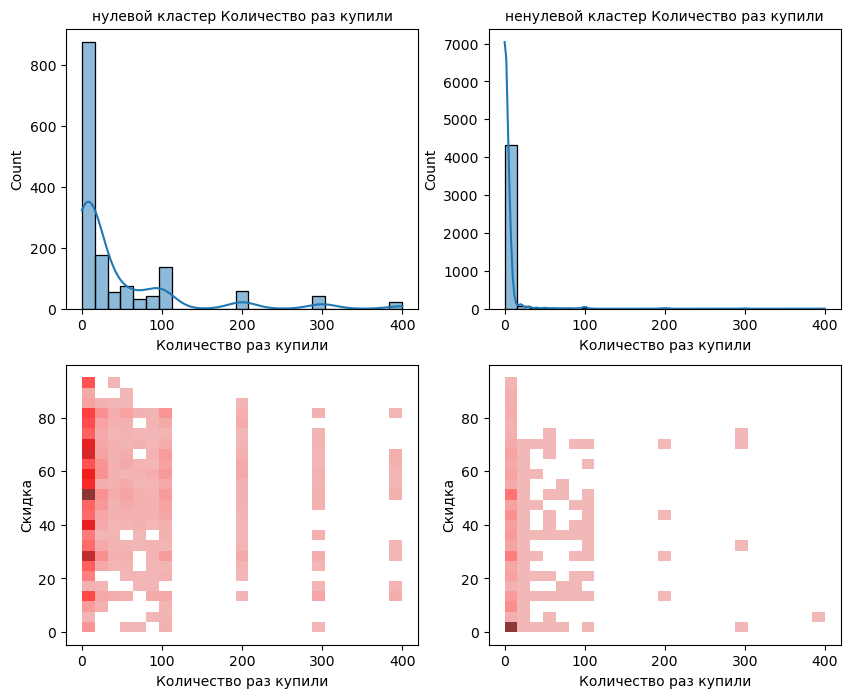

In [307]:
for i in num_cols:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    sns.histplot(
        data=data[data['cluster']==0],
        x=i,
        bins=25,
        kde=True,
        ax=axes[0,0]
    );
    axes[0,0].set_title(f'нулевой кластер {i}', fontsize=10)
    sns.histplot(
        data=data[data['cluster']==0],
        x=i,
        y='Скидка',
        bins=25,
        color='red',
        ax=axes[1,0]
    );
    sns.histplot(
        data=data[data['cluster']!=0],
        x=i,
        bins=25,
        kde=True,
        ax=axes[0,1]
    );
    axes[0, 1].set_title(f'ненулевой кластер {i}', fontsize=10)
    sns.histplot(
        data=data[data['cluster']!=0],
        x=i,
        y='Скидка',
        bins=25,
        color='red',
        ax=axes[1,1]
    );
    
    plt.savefig(f'Сравнение Гистограмма распределения в зависимости от скидки нулевого и ненулевого кластера {i}.png')

In [ ]:
#plt.savefig(f'Гистограмма распределения {i}.png')